## SciKit-Learn 사용법

In [1]:
# 데이터 분리
from sklearn.model_selection import train_test_split
# 사이킷런 내장 데이터셋
from sklearn.datasets import load_iris, load_boston
# K-Fold
from sklearn.model_selection import KFold
# 평가지표 구하기
from sklearn.metrics import roc_auc_score
# 모델 생성
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# 데이터스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font',family='Malgun Gothic')

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=data.target, random_state=66)

## LR

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# 다항회귀
# LogisticREgression(multi_class='multinomial')

In [6]:
lr.fit(X_train, y_train)

C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
lr.score(X_test, y_test)

0.9370629370629371

## KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
knn.score(X_test, y_test)

0.9230769230769231

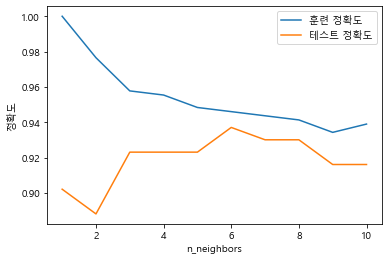

In [12]:
train_acc = []
test_acc = []

for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    train_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))

plt.plot([i for i in range(1,11)],train_acc,label='훈련 정확도')
plt.plot([i for i in range(1,11)],test_acc,label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

## SVM

In [13]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.9248826291079812
0.9230769230769231


C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## 결정 트리

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=10)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

1.0
0.9300699300699301


In [15]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',class_names=['악성','양성'],feature_names=data.feature_names,impurity=False,filled=True)

In [16]:
# 주피터 환경에서 실행되지 않으면 코랩으로 실행해주세요!
# !pip install graphviz

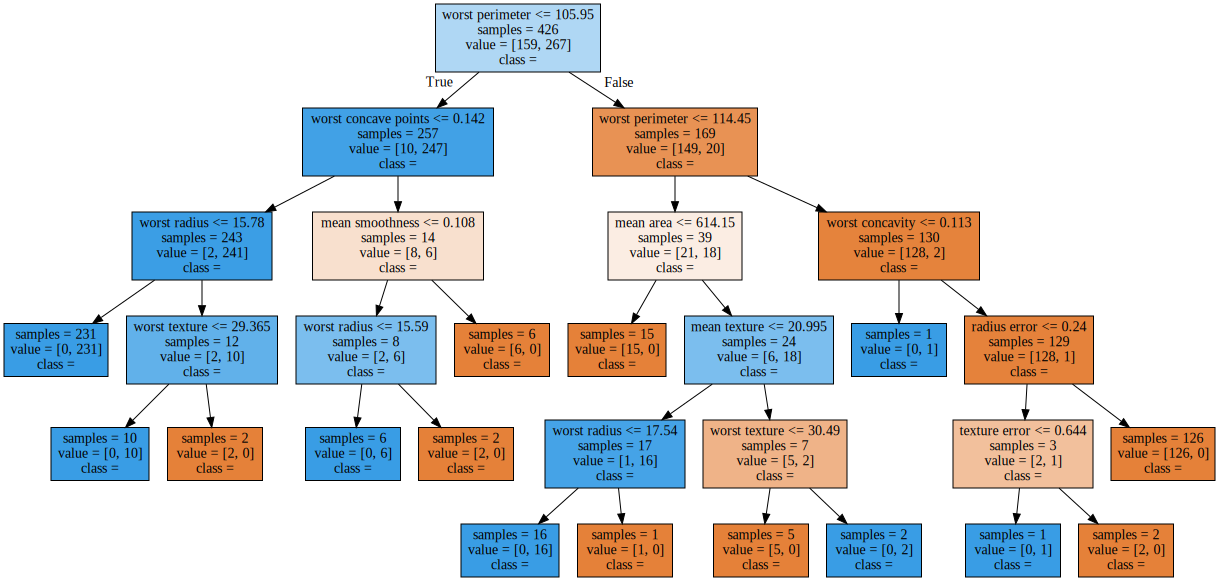

In [18]:
import graphviz
with open('tree.dot', encoding='UTF8') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))